<a href="https://colab.research.google.com/github/chonzadaniel/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/


## 0. Computer Vision libararies in PyTorch

* [`torchvision`] (https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loadking fuctions for computer vision here
* `torchvision.models` - get pretrained computer vision models that can leverage for own problems
* `torchvision.transforms` - functions for manipulating vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


# 1. Getting a dataset

The dataset to be used is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision/datasets/FashionMNIST/html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data
from torchvision import datasets

# Create how train set will be loaded
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None
)

# Create how test data set will be loaded
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5013000.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136174.51it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2726692.32it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3900339.05it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Visualizing image labels
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
# Visualizing image labels and respective index (targets)
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shapes of data

In [7]:
# Accessing an image and its corresponding label from the training dataset
image, label = train_data[0]  # Access the first image and label

# Check the image shape and print label
print(f"Image shape: {image.shape} -> [color_channels, height, width]")  # Channel is removed after squeezing
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


# 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


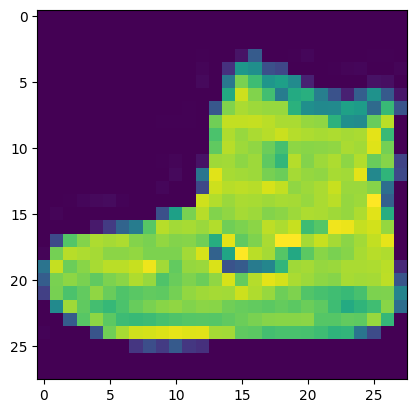

In [8]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
# image

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
# plt.imshow(image.squeeze())
image

Image shape: torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
# plt.imshow(image)
# image

Image shape: torch.Size([1, 28, 28])


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

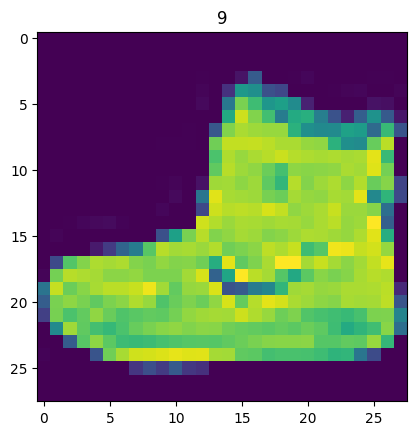

In [11]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
# image

Text(0.5, 1.0, 'Ankle boot')

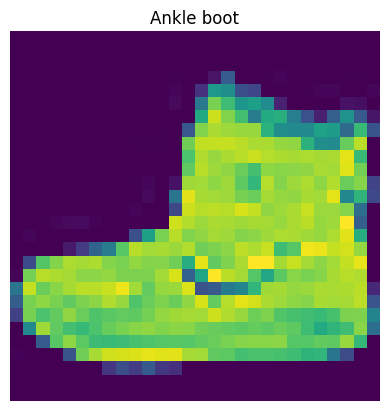

In [12]:
import matplotlib.pyplot as plt

image, label = train_data[0]
# print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)
plt.title(class_names[label])
# image

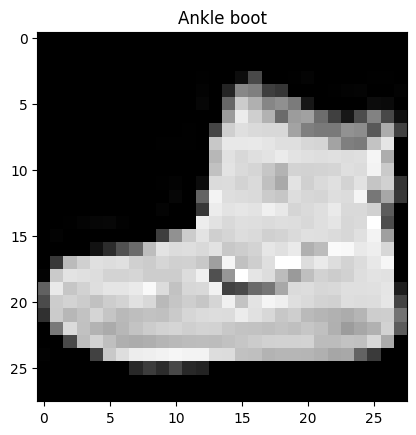

In [13]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

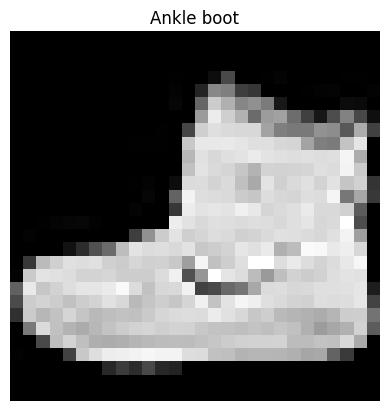

In [14]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

In [15]:
# Plot more images
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    random_idx

<Figure size 900x900 with 0 Axes>

In [16]:
# Plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

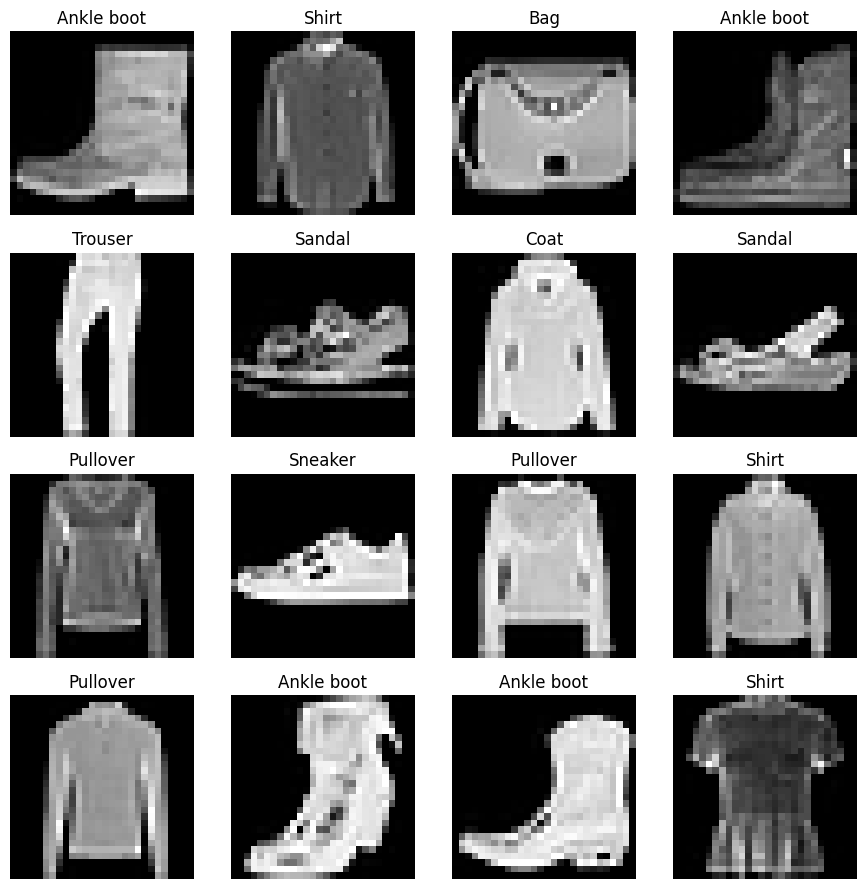

In [17]:
# Setup a figure to plot the images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))  # Create a figure of size 9x9 inches
rows, cols = 4, 4  # Define the grid size

# Plot images in a grid
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(len(train_data), size=(1,)).item()  # Get a random index
    img, label = train_data[random_idx]  # Use indexing to access the dataset
    img = img.squeeze()  # Squeeze the image to remove channel dimension
    ax = fig.add_subplot(rows, cols, i)  # Add a subplot
    ax.imshow(img, cmap='gray')  # Show the image in grayscale
    ax.set_title(class_names[label])  # Set the title of the subplot to the label of the image
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()  # Display the figure with the images

In [18]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# Prepare DataLoader

Right now, the data is in the form of PyTorch Datasets.

DataLoader turns the dataset into Python iterable.

More specifically, it's about data into baches (or min-batches)

Why would we do this?

1. It is more computationally efficient, as in computing hardware may not be able to look (store in memory) at 60000 images in one hit. So breaking it down to images at time (batch size of 32)
2. It gives the neural network more chances to update its gradient per each epoch.


For more on mini-batches, see here:
* https://www.youtube.com/watch?v=uFN40asG61g
* https://www.youtube.com/watch?v=PmwNZGrrggE
* https://www.youtube.com/watch?v=SftOqbMrGfE

In [19]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn dataset into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78518899d3f0>,
 <torch.utils.data.dataloader.DataLoader at 0x78518899ee90>)

In [20]:
# Chek out what is created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Lenth of testd_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78518899d3f0>, <torch.utils.data.dataloader.DataLoader object at 0x78518899ee90>)
Length of train_dataloader: 1875 batches of 32....
Lenth of testd_dataloader: 313 batches of 32....


In [21]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


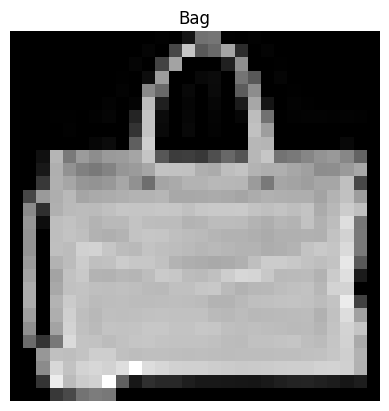

In [22]:
#Show a sample
# torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiment, it's best paractice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [23]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]


# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [ color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [ color_channels, height * width]


In [24]:
from torch import nn
class FashionMNISTV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):

        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [25]:
# Instantiating the Model 0
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Setup model with input parameters
model_0 = FashionMNISTV0(
    input_shape= 784, # this is 28 * 28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [27]:
model_0(dummy_x).shape

torch.Size([1, 10])

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss fucntion - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [28]:
import requests
from pathlib import Path

# File and URL setup
helper_file_path = Path("helper_functions.py")
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

# Delete the incorrect file if it exists
if helper_file_path.is_file():
    with open(helper_file_path, 'r') as file:
        first_line = file.readline()
        if first_line.startswith('<!doctype html>'):  # Check if the file content is HTML
            print("HTML content detected, deleting the file...")
            helper_file_path.unlink()  # Delete the file
            print("Deleted HTML file.")
        else:
            print("Python file already exists and looks correct, skipping download....")
            exit()

# Download the correct file
print(f"Downloading {helper_file_path} from GitHub...")
response = requests.get(url)
if response.status_code == 200:
    with open(helper_file_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {helper_file_path} successfully!")
else:
    print(f"Failed to download {helper_file_path}. Status code: {response.status_code}")

# Try importing the accuracy function
try:
    from helper_functions import accuracy_fn
    print("Imported accuracy_fn successfully.")
except ImportError as e:
    print(f"Failed to import accuracy_fn: {e}")

Downloaded helper_functions.py successfully!
Imported accuracy_fn successfully.


In [29]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to stack are:
1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [30]:
from timeit import default_timer as timer
import torch
from torch import nn

def print_train_time(
        start: float,
        end: float,
        device: torch.device = None):
    """Prints difference between start and end time."""

    total_time = end - start
    print(f"Train time on { device}: {total_time:.3f} seconds")
    return total_time

start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.407800000194584e-05

In [31]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch than once per epoch...

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the training loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).


In [32]:
# Import tqdm for progess bar
from tqdm.auto import tqdm
import torch
from torch import nn

# Set the seed and start the time
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
train_time_start_on_cpu = timer()

# Set the number of epochs (a small number for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ## Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch):
        loss = loss_fn(y_pred, y)
        train_loss+= loss# Accumulate train loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Print out what's happening
    if batch % 400 ++ 0:
        print(f"Look at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

# Divide total train loss by length of train dataloader
train_loss /= len(train_dataloader)

### Testing
test_loss, test_acc = 0, 0
model_0.eval()

with torch.inference_mode():
    for X_test, y_test in test_dataloader:

        # 1. Forward pass
        test_pred = model_0(X_test)
        # 2. Calculate loss (accumulatively)
        test_loss += loss_fn(test_pred, y_test)

        # 3. Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

# Print out what's happening
print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2}%")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Look at 59968 / 60000 samples.
Epoch: 1
------
Look at 59968 / 60000 samples.
Epoch: 2
------
Look at 59968 / 60000 samples.

Train loss: 0.4532 | Test loss: 0.5109, Test acc: 8.2e+01%
Train time on cpu: 26.424 seconds


In [33]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0068,  ..., -0.0018,  0.0072,  0.0173],
        [-0.0189, -0.0355,  0.0157,  ...,  0.0174,  0.0110,  0.0108],
        [-0.0008,  0.0019,  0.0032,  ...,  0.0121, -0.0118,  0.0077],
        ...,
        [-0.0115,  0.0275, -0.0321,  ...,  0.0541,  0.0470,  0.0010],
        [-0.0231,  0.0252,  0.0238,  ..., -0.0809, -0.0377, -0.0076],
        [ 0.0175, -0.0148,  0.0030,  ..., -0.1108, -0.0660,  0.0111]],
       requires_grad=True)

# Make predictions and get Model 0 results

In [34]:
import torch
from torch import nn

RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)

# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    """Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))


        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 rsults on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_end_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

Train time on cuda: 0.000 seconds


# Setup device agnostic-code (for using a GPU if there is one)


In [35]:
!nvidia-smi

Fri May 24 13:08:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [36]:
torch.cuda.is_available()

True

In [37]:
# Setup device agnostic code
import torch

device = "cuda"if torch.cuda.is_available() else "cpu"
device

'cuda'

# 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02-https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [38]:
# Creating a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):

        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [39]:
# Create an instance of model_1
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_1 = FashionMNISTModelV1(input_shape=784, # This is the output of the flatten after our 28 * 28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available


next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1 Setup loss, optimizer and evaluation metrics

In [40]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

## 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:

* training loop - `train_step()`
* testing loop - `test_step()`

In [41]:
# def train_step(model: torch.nn.Module,
#                data_loader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                accuracy_fn,
#                device: torch.device = device):

#     """Performs a training with the model trying to learn from the data_loader."""

#     train_loss, train_acc = 0, 0

#     # Put model into training mode
#     model.train()

#     # Add a loop to iterate through the training batches
#     for batch, (X, y) in enumerate(data_loader):
#         # Put data on the target device
#         X, y = X.to(device), y.to(device)

#         # 1. Forward pass
#         y_pred = model(X)

#         # 2. Calculate loss (per batch)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss.item()  # Accumulate the loss
#         train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # Convert logits to prediction labels

#         # 3. Optimizer zero gradients
#         optimizer.zero_grad()

#         # Backward pass
#         loss.backward()

#         # Optimizer step (update the model's parameters once per batch)
#         optimizer.step()

#     # Calculate average train loss and accuracy
#     train_loss /= len(data_loader)
#     train_acc /= len(data_loader)
#     print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [42]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    """Performs a training with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0

    # Put model into traiing mode
    model.train()

    # Add a lop to loop through the training batches

    for barch, (X, y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Foward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss# cummulates train loss
        train_acc += accuracy_fn(y_true= y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step (update the model's parameters once *per batch*
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [43]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""

    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    # Turn inference model context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y, = X.to(device), y.to(device)

            # 1. Forward pass

            test_pred = model(X)

            # 2. Calculate the loss/acc
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:5f} | Test acc: {test_acc:.2f}%\n")

In [44]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step())
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
    )

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
    )

# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_end_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34%
Test Loss: 0.956365 | Test acc: 65.00%

Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93%
Test Loss: 0.722267 | Test acc: 73.91%

Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94%
Test Loss: 0.685001 | Test acc: 75.02%

Train time on cuda: 0.000 seconds


In [45]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

In [46]:
total_train_time_model_0

26.42373009000002

**Note:** Sometimes, depending on the data/hardware, the model may strain fater on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by GPU.
2. The hardware used has a better CPU in terms of compute capability than the GPU.

For more on how to make models compute faster, see: https://horace.io/brrr_intro.html

In [47]:
import torch
from torch import nn
from tqdm import tqdm

# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):  # Pass the device as a parameter to ensure flexibility

    """Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0, 0
    model.to(device)  # Ensure the model is on the right device
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)  # Move data to the correct device

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y).item()  # Make sure to call .item() to get Python number
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and accuracy to find the average loss/accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}

# Assume model_1, test_dataloader, loss_fn, and accuracy_fn are defined
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

100%|██████████| 313/313 [00:01<00:00, 287.92it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009789101232,
 'model_acc': 75.01996805111821}

In [48]:
total_train_time_model_1

0.0

# 7. Model 2: Building a Convolution Neural Network (CNN)

CNN's are also know as ConvNets.

CNN's are know for their capabilities to find patterns in visual data.

A CNN is a neural network: an algorithm used to recognize patterns in data. Neural Networks in general are composed of a collection of neurons that are organized in layers, each with their own learnable weights and biases.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [49]:
# Create a Convolutional neural newtwork

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a Conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values which can be set by ML Engineers/Data Scientists in the NN's are called hyperparameters

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [50]:
image.shape

torch.Size([1, 28, 28])

In [51]:
RANDOM_SEED = (42)

torch.manual_seed(RANDOM_SEED)
model_2 = FashionMNISTModelV2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [52]:
RANDOM_SEED = 42

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

        [[-0

In [53]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [54]:
test_image

tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

        [[-0.9010, -0.5509,  0.8681,  ...,  0.6061, -0.5306, -0.7076],
         [-1.2771, -0.3144,  0.7196,  ...,  1

In [55]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-0.7191,  0.2984,  0.2344,  ..., -0.7341,  0.3615,  0.6315],
          [-0.3899,  0.1102,  0.4247,  ...,  1.3676,  0.3512,  0.6649],
          [-0.0531, -0.4325, -0.3116,  ...,  0.3787,  0.8871,  0.1713],
          ...,
          [-0.0034, -0.0955, -1.8630,  ...,  0.9274, -0.4092, -0.3963],
          [ 0.1331, -0.8694,  0.6833,  ...,  0.9729,  1.1234,  0.0140],
          [-0.2661,  0.4148,  0.7564,  ..., -0.2774, -1.0826, -0.3362]],

         [[ 0.5690,  0.5389, -0.2815,  ..., -0.0713,  0.1746,  0.2696],
          [ 0.5931, -0.1658, -0.0744,  ..., -0.3920,  0.6388, -0.2363],
          [ 0.4522, -0.2542,  0.3681,  ..., -0.1026, -0.7961,  0.5856],
          ...,
          [ 0.0116, -0.7550,  0.6264,  ..., -0.1654,  0.2966,  0.1014],
          [-1.0194,  0.8830, -1.3811,  ..., -0.3361,  0.1321, -0.3717],
          [-0.2282, -0.4580,  0.0428,  ..., -0.3325,  0.6974, -0.1458]],

         [[-0.4686,  0.9058, -1.3918,  ..., -0.4580, -0.0033, -0.6134],
          [ 0.0542,  0.2097,  

In [56]:
conv_output.shape

torch.Size([1, 10, 62, 62])

## 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch/nn.MaxPool2d.html

In [57]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"The image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
The image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [58]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [59]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [60]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

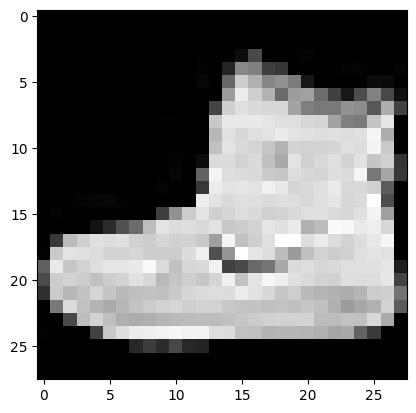

In [61]:
plt.imshow(image.squeeze(), cmap="gray")

## 7.3 Setup a loss function and optimizer for `model_2`

In [62]:
# Setuploss function/eva metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [63]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using the training and test functions

In [64]:
import torch
from torch import nn
from tqdm import tqdm

# Create a device agnostic-code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()


# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.58873 | Train acc: 78.50%


 33%|███▎      | 1/3 [00:13<00:26, 13.24s/it]

Test Loss: 0.405734 | Test acc: 85.43%

Epoch: 1
-----------
Train loss: 0.36396 | Train acc: 86.77%


 67%|██████▋   | 2/3 [00:25<00:12, 12.86s/it]

Test Loss: 0.356478 | Test acc: 86.95%

Epoch: 2
-----------
Train loss: 0.32671 | Train acc: 88.21%


100%|██████████| 3/3 [00:39<00:00, 13.02s/it]

Test Loss: 0.332673 | Test acc: 87.92%

Train time on cuda: 39.065 seconds


In [65]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

100%|██████████| 313/313 [00:01<00:00, 251.05it/s]


In [66]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3326734361557153,
 'model_acc': 87.91932907348243}

# 8. Compare model results and training time

In [67]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.510876,82.378195
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.332673,87.919329


In [68]:
# Ass training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.510876,82.378195,26.423730
1,FashionMNISTModelV1,0.685001,75.019968,0.000000
2,FashionMNISTModelV2,0.332673,87.919329,39.064616


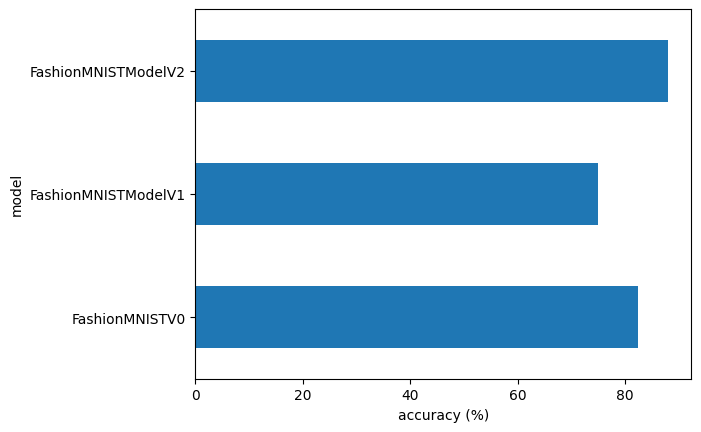

In [69]:
# Visualize the model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# 9. Make and evaluate random predictions with best model

In [70]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get predictions probability (logit -> prediciton probabilities -> prediction labels)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [71]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Pullover')

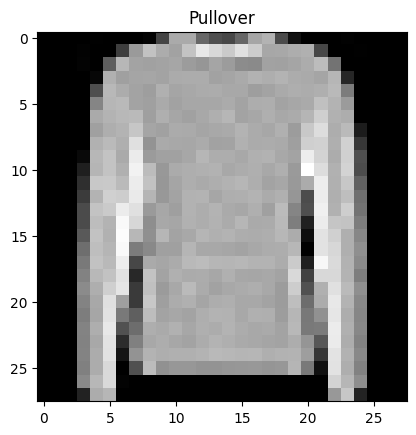

In [72]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [73]:
# Make predicitons
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first tow prediction probabilities
pred_probs[:2]

tensor([[1.8664e-02, 7.6201e-05, 9.2942e-01, 3.7881e-04, 5.4668e-03, 1.3073e-05,
         4.5854e-02, 6.5210e-06, 1.1089e-04, 1.1253e-05],
        [1.1481e-04, 3.3018e-06, 5.4258e-05, 2.0000e-05, 7.7128e-06, 1.5292e-03,
         4.2015e-05, 7.2978e-01, 8.7940e-04, 2.6757e-01]])

In [74]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 7, 3, 7, 3, 5, 9, 8, 6])

In [75]:
test_labels

[2, 7, 3, 7, 3, 5, 9, 8, 6]

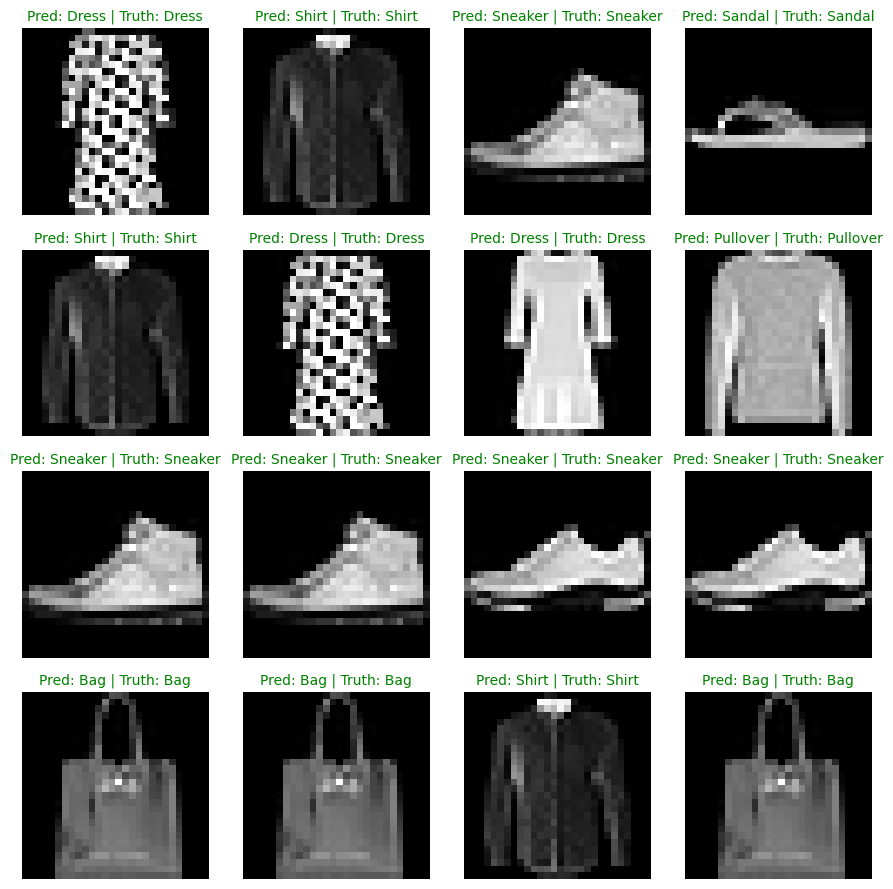

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set the random seed for reproducibility (optional)
# torch.manual_seed(42)

plt.figure(figsize=(9, 9))
nrows = 4
ncols = 4
num_images = nrows * ncols

# Generate random indices
indices = torch.randint(high=len(test_samples), size=(num_images,))

for i in range(num_images):
    idx = indices[i]  # Get a random index

    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    # Ensure that sample is appropriately squeezed if it has an extra dimension
    plt.imshow(test_samples[idx].squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g., "Sandal")
    pred_label = class_names[pred_classes[idx]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[idx]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="green")  # green text if prediction is the same as truth
    else:
        plt.title(title_text, fontsize=10, color="red")

    plt.axis(False)

plt.tight_layout()
plt.show()

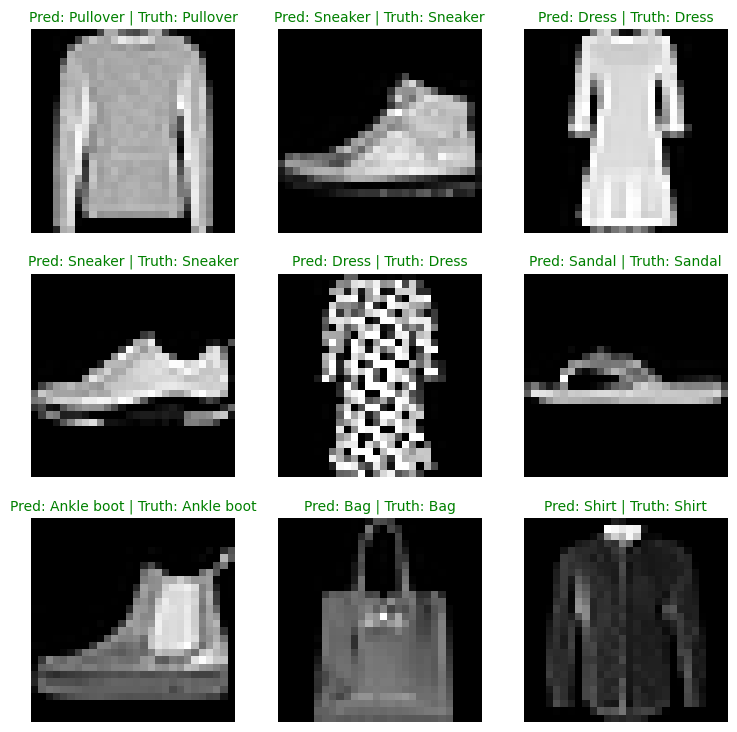

In [77]:
# Plot predictions

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):

    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and shange color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if prediction is same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

# 10. Making a confusion maxtrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix()` - https://torchmetrics.readthedocs.io/en/stable/classificaiton/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [78]:
# from tqdm.auto import tqdm
from tqdm.auto import tqdm

In [79]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [80]:
# 1. Make predictions with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= "Making predictions..."):

        # Send the data and target to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

        # Concatenate list of predictions into a tensor
        # print(y_preds)
        y_pred_tensor = torch.cat(y_preds)
        y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [81]:
len(y_pred_tensor)

10000

In [82]:
# See if required package are installed and if not, install them...

try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__verison__}")
    assert int(mlxtend.__verison__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    # print(f"mlxtend verions: {mlxtend.__verion__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.6 MB/s eta 0:00:00


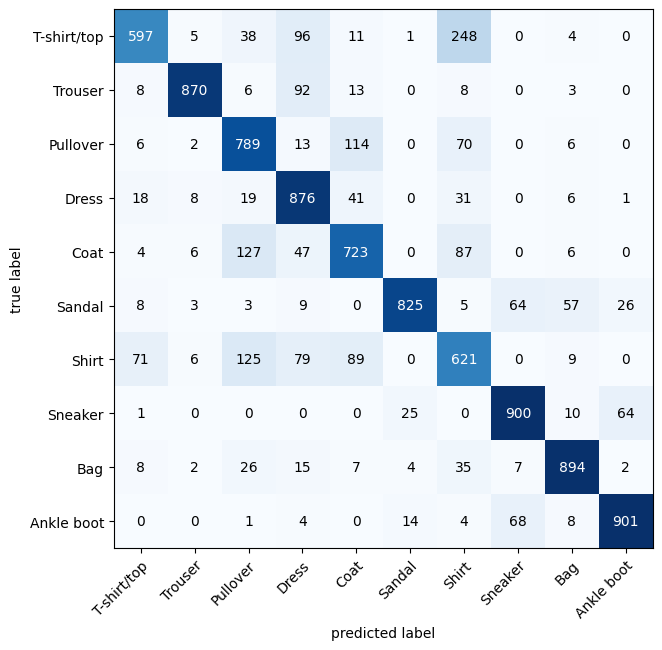

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

In [84]:
confmat_tensor

tensor([[597,   5,  38,  96,  11,   1, 248,   0,   4,   0],
        [  8, 870,   6,  92,  13,   0,   8,   0,   3,   0],
        [  6,   2, 789,  13, 114,   0,  70,   0,   6,   0],
        [ 18,   8,  19, 876,  41,   0,  31,   0,   6,   1],
        [  4,   6, 127,  47, 723,   0,  87,   0,   6,   0],
        [  8,   3,   3,   9,   0, 825,   5,  64,  57,  26],
        [ 71,   6, 125,  79,  89,   0, 621,   0,   9,   0],
        [  1,   0,   0,   0,   0,  25,   0, 900,  10,  64],
        [  8,   2,  26,  15,   7,   4,  35,   7, 894,   2],
        [  0,   0,   1,   4,   0,  14,   4,  68,   8, 901]])

# 11. Save and load best performing model


In [85]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [86]:
image_shape = [1, 28, 28]

In [87]:
# Create a new new instance
torch.manual_seed(RANDOM_SEED)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [88]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3326734361557153,
 'model_acc': 87.91932907348243}

In [89]:
# Evaluate loaded model
torch.manual_seed(RANDOM_SEED)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3326734361557153,
 'model_acc': 87.91932907348243}

In [90]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3326734361557153,
 'model_acc': 87.91932907348243}

In [91]:
# Example with multiple metrics
all_close = torch.all(torch.isclose(torch.tensor([model_2_results["model_loss"], model_2_results["model_acc"]]),
                                    torch.tensor([loaded_model_2_results["model_loss"], loaded_model_2_results["model_acc"]]),
                                    atol=1e-8))
all_close

tensor(True)